In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import tensorflow as tf
from tensorflow.keras import utils

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc
rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [ ]:
import pandas as pd
from IPython.display import display, HTML
from collections import Counter
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 데이터 불러오기
import csv
f = open('data_all_0805_sentiment.csv', 'r', encoding='utf-8')
lines = csv.reader(f)
header = next(lines)
print(header)
f.close()

review = pd.read_csv('data_all_0805_sentiment.csv', encoding='utf-8')
review.head()

['브랜드', '평점', '피부타입', '피부 고민', '자극도', '리뷰', 'sentiment']


,브랜드,평점,피부타입,피부 고민,자극도,리뷰,sentiment
0,닥터지,4,복합성에 좋아요,진정에 좋아요,보통이에요,컵 받고싶어서 샀어요 크림은 튜브형태러 내줄 생각은 없는건지 궁금해요,1
1,닥터지,5,건성에 좋아요,진정에 좋아요,자극없이 순해요,닥터지는 사계절 내내 잘 사용하고잇어요 물론 건성피부에게 겨울에는 얼굴당김잇어서...,1
2,닥터지,5,복합성에 좋아요,진정에 좋아요,보통이에요,아빠 사드렸는데 좋아해요 근데 바르는게 쫌 별로긴 한데 투브타입으로 나오면 더 좋을 듯,1
3,닥터지,5,건성에 좋아요,보습에 좋아요,자극없이 순해요,국민 수분 크림이라 그런지 모든 피부타입에도 잘 맞으면서 무난한 아이템이에요 당황이...,1
4,닥터지,4,복합성에 좋아요,보습에 좋아요,자극없이 순해요,여름용 수분크림이 필요해서 산 제품이에요 가격은 세일가로 8800원 했어요사실 ...,1


In [ ]:
review.columns

Index(['브랜드', '평점', '피부타입', '피부 고민', '자극도', '리뷰', 'sentiment'], dtype='object')

In [ ]:
review.tail()

,브랜드,평점,피부타입,피부 고민,자극도,리뷰,sentiment
6842,에스트라,1,건성에 좋아요,보습에 좋아요,자극없이 순해요,재구매했어요 건성한테 진심 추천 가격올리면 가만안둬,0
6843,에스트라,2,건성에 좋아요,보습에 좋아요,보통이에요,복합성인데 겨울에 건조한 피부입니다 모공막은 성분때문에 뭐가 나는것같습니다 건성이신...,0
6844,에스트라,2,복합성에 좋아요,보습에 좋아요,보통이에요,기름기가 없어서 좋네요 보습은 시간지나면 좀 당깁니다,0
6845,에스트라,2,건성에 좋아요,보습에 좋아요,자극이 느껴져요,5통넘게쓱있는데 정말무난하게쓰여용 자극없이 순해요,0
6846,에스트라,2,건성에 좋아요,보습에 좋아요,보통이에요,모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요,0


In [ ]:
texts = review['리뷰'].values
labels = review['sentiment'].values

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(texts, encoded_labels, test_size=0.3, random_state=731)

In [ ]:
max_words = 10000  # 사용할 최대 단어 수
max_len = 100  # 각 시퀀스의 최대 길이

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'잘': 1, '너무': 2, '좋아요': 3, '같아요': 4, '것': 5, '더': 6, '피부가': 7, '피부': 8, '바르고': 9, '이': 10, '좋은': 11, '피부에': 12, '많이': 13, '다': 14, '수': 15, '저는': 16, '좋고': 17, '진짜': 18, '쓰고': 19, '있어요': 20, '크림': 21, '좀': 22, '정말': 23, '꾸준히': 24, '안': 25, '촉촉하고': 26, '바로': 27, '이거': 28, '바르면': 29, '여름에': 30, '순하고': 31, '때': 32, '않고': 33, '있어서': 34, '좋아서': 35, '없이': 36, '있는': 37, '제품': 38, '사용하고': 39, '엄청': 40, '닥터지': 41, '느낌이': 42, '얼굴에': 43, '수분': 44, '구매했어요': 45, '좋네요': 46, '거': 47, '딱': 48, '좋습니다': 49, '또': 50, '다른': 51, '아주': 52, '없고': 53, '계속': 54, '사용하기': 55, '제품은': 56, '조금': 57, '제': 58, '같이': 59, '에스트라': 60, '않아서': 61, '그냥': 62, '얼굴': 63, '제가': 64, '이번에': 65, '쓰기': 66, '그리고': 67, '사용': 68, '발라도': 69, '해서': 70, '크림을': 71, '있습니다': 72, '요즘': 73, '한': 74, '완전': 75, '있는데': 76, '근데': 77, '항상': 78, '앰플': 79, '일단': 80, '크림은': 81, '수분크림': 82, '전': 83, '자극없이': 84, '넘': 85, '확실히': 86, '그래서': 87, '아이크림': 88, '흡수도': 89, '흡수가': 90, '제품을': 91, '없어서': 92, '마녀공장': 93, '미스트': 94, '아비브': 95, '좋았어요': 96, '리뉴얼': 

In [ ]:
vocab_size = len(word_to_index) + 1
print('전체 단어 집합의 크기 : ', vocab_size)

전체 단어 집합의 크기 :  29545


In [ ]:
# 패딩 처리
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.3):  # Dropout 비율 조정
        super(TransformerEncoder, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu", kernel_regularizer=l2(0.01)),  # L2 정규화 추가
             Dense(embed_dim, kernel_regularizer=l2(0.01))]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training): # training 오류 발생 시 -> training=False로 작성
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
def build_model(max_len, max_words):
    embed_dim = 128
    num_heads = 4
    ff_dim = 128

    inputs = Input(shape=(max_len,))
    embedding_layer = Embedding(input_dim=max_words, output_dim=embed_dim, input_length=max_len)(inputs)
    transformer_block = TransformerEncoder(embed_dim, num_heads, ff_dim)(embedding_layer)
    x = GlobalAveragePooling1D()(transformer_block)
    x = Dropout(0.3)(x)  # Dropout 비율 조정
    x = Dense(20, activation="relu", kernel_regularizer=l2(0.01))(x)  # L2 정규화 추가
    x = Dropout(0.3)(x)  # Dropout 비율 조정
    outputs = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

model_transformer = build_model(max_len, max_words)
model_transformer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 transformer_encoder (Transf  (None, 100, 128)         297344    
 ormerEncoder)                                                   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                2580  

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

In [ ]:
history_transformer = model_transformer.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_split=0.2, callbacks=[es, lr_scheduler])

Epoch 1/3


2024-08-08 11:12:16.367839: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


120/120 [==============================] - 26s 211ms/step - loss: 2.0373 - accuracy: 0.8448 - val_loss: 1.1509 - val_accuracy: 0.8259 - lr: 0.0010
Epoch 2/3
120/120 [==============================] - 30s 247ms/step - loss: 0.7313 - accuracy: 0.8750 - val_loss: 0.3875 - val_accuracy: 0.9385 - lr: 0.0010
Epoch 3/3
120/120 [==============================] - 28s 231ms/step - loss: 0.2565 - accuracy: 0.9653 - val_loss: 0.3182 - val_accuracy: 0.9374 - lr: 0.0010


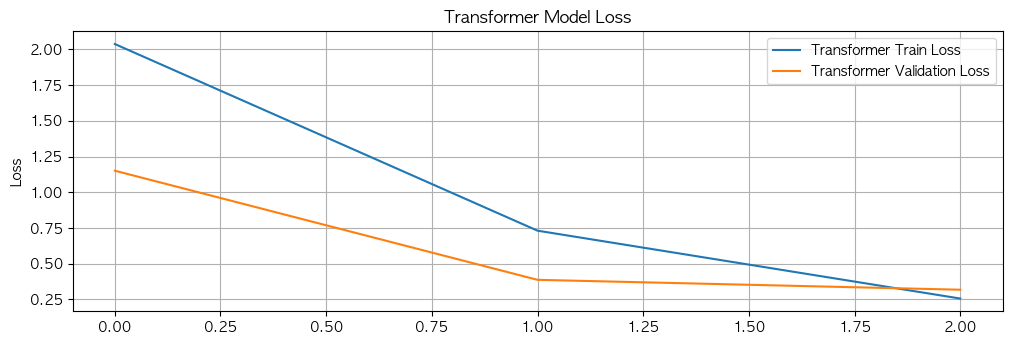

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(history_transformer.history['loss'], label='Transformer Train Loss')
plt.plot(history_transformer.history['val_loss'], label='Transformer Validation Loss')
plt.title('Transformer Model Loss')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

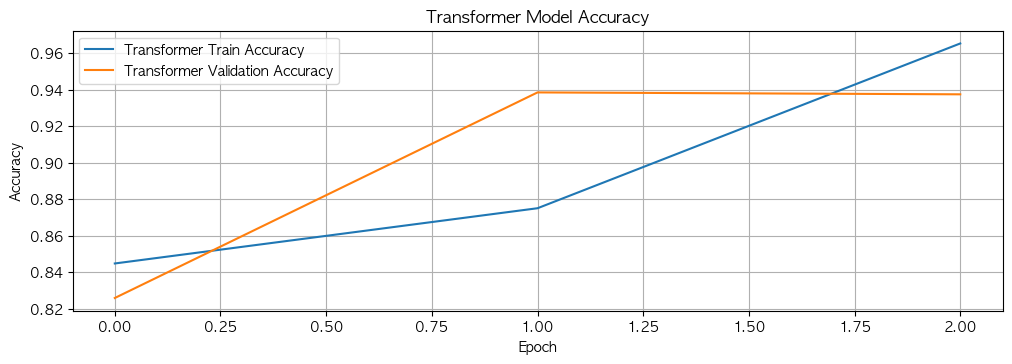

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(history_transformer.history['accuracy'], label='Transformer Train Accuracy')
plt.plot(history_transformer.history['val_accuracy'], label='Transformer Validation Accuracy')
plt.title('Transformer Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_transformer.save('review_transformer_model')

INFO:tensorflow:Assets written to: review_transformer_model/assets


INFO:tensorflow:Assets written to: review_transformer_model/assets


In [ ]:
# 리뷰 예측 함수
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text])
    review_pad = pad_sequences(review_seq, maxlen=max_len)

    prediction = model.predict(review_pad)

    sentiment = "긍정" if prediction >= 0.5 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]

    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "이 제품은 정말 좋았어요! 강력 추천합니다."

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 111ms/step
리뷰: 이 제품은 정말 좋았어요! 강력 추천합니다.
예측된 감정: 긍정
예측 확률: 0.9978


In [ ]:
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text])
    review_pad = pad_sequences(review_seq, maxlen=max_len)

    prediction = model.predict(review_pad)

    sentiment = "긍정" if prediction >= 0.5 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]

    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "지성이고 써봤는데 여드름이 너무 많이 났어요. 재구매 의사 없습니다."

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 16ms/step
리뷰: 지성이고 써봤는데 여드름이 너무 많이 났어요. 재구매 의사 없습니다.
예측된 감정: 부정
예측 확률: 0.9803


In [ ]:
# 모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text])
    review_pad = pad_sequences(review_seq, maxlen=max_len)

    prediction = model.predict(review_pad)

    sentiment = "긍정" if prediction >= 0.5 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]

    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요"

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 17ms/step
리뷰: 모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요
예측된 감정: 부정
예측 확률: 0.8241


In [ ]:
# 모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text])
    review_pad = pad_sequences(review_seq, maxlen=max_len)

    prediction = model.predict(review_pad)

    sentiment = "긍정" if prediction >= 0.3 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]

    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요"

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 17ms/step
리뷰: 모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요
예측된 감정: 부정
예측 확률: 0.8241


In [ ]:
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text])
    review_pad = pad_sequences(review_seq, maxlen=max_len)

    prediction = model.predict(review_pad)

    sentiment = "긍정" if prediction >= 0.5 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]

    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "엄청 극적인 효과까지는 모르겠어요"

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 16ms/step
리뷰: 엄청 극적인 효과까지는 모르겠어요
예측된 감정: 부정
예측 확률: 0.8977


In [ ]:
# 부정적인 리뷰 예측 예제
negative_review = "이 제품은 별로였어요. 다시는 사고 싶지 않아요."

# 예측
predict_sentiment(negative_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 27ms/step
리뷰: 이 제품은 별로였어요. 다시는 사고 싶지 않아요.
예측된 감정: 부정
예측 확률: 0.6550


In [ ]:
# 부정적인 리뷰 예측 예제
negative_review = "최고 짱 "

# 예측
predict_sentiment(negative_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 56ms/step
리뷰: 최고 짱 
예측된 감정: 긍정
예측 확률: 0.9999


In [ ]:
model_transformer = load_model('review_transformer_model')
tokenizer = Tokenizer()
max_len = 100

In [ ]:
model_transformer = tf.keras.models.load_model('review_transformer_model')

In [ ]:
# '브랜드'와 '리뷰' 컬럼이 정확한지 확인한 후 필터링
review_filtered = review[review['브랜드'] == '닥터지']

review_filtered.head()

,브랜드,평점,피부타입,피부 고민,자극도,리뷰,sentiment
0,닥터지,4,복합성에 좋아요,진정에 좋아요,보통이에요,컵 받고싶어서 샀어요 크림은 튜브형태러 내줄 생각은 없는건지 궁금해요,1
1,닥터지,5,건성에 좋아요,진정에 좋아요,자극없이 순해요,닥터지는 사계절 내내 잘 사용하고잇어요 물론 건성피부에게 겨울에는 얼굴당김잇어서...,1
2,닥터지,5,복합성에 좋아요,진정에 좋아요,보통이에요,아빠 사드렸는데 좋아해요 근데 바르는게 쫌 별로긴 한데 투브타입으로 나오면 더 좋을 듯,1
3,닥터지,5,건성에 좋아요,보습에 좋아요,자극없이 순해요,국민 수분 크림이라 그런지 모든 피부타입에도 잘 맞으면서 무난한 아이템이에요 당황이...,1
4,닥터지,4,복합성에 좋아요,보습에 좋아요,자극없이 순해요,여름용 수분크림이 필요해서 산 제품이에요 가격은 세일가로 8800원 했어요사실 ...,1


# 최종

In [ ]:
model_transformer = tf.keras.models.load_model('review_transformer_model')

In [ ]:
# 리뷰 전처리
def preprocess_reviews(reviews, tokenizer, max_len):
    sequences = tokenizer.texts_to_sequences(reviews)
    padded_sequences = pad_sequences(sequences, maxlen=max_len)
    return padded_sequences

In [ ]:
# 리뷰 필터링
def filter_reviews_by_sentiment_keyword(df, keyword, sentiment_col='sentiment', rating_col='평점', sentiment_target='부정', num_reviews=10):
    if sentiment_target == '부정':
        filtered_df = df[(df[sentiment_col] == '0') | (df[rating_col].isin([1, 2]))]
    elif sentiment_target == '긍정':
        filtered_df = df[(df[sentiment_col] == '1') | (df[rating_col].isin([4, 5]))]
    else:
        raise ValueError("sentiment_target은 '부정' 또는 '긍정'이어야 합니다.")

    keyword_filtered_df = filtered_df[filtered_df['리뷰'].str.contains(keyword, case=False, na=False)]
    unique_reviews = keyword_filtered_df['리뷰'].drop_duplicates()
    filtered_reviews = unique_reviews.head(num_reviews).tolist()
    return filtered_reviews

In [ ]:
# 단어 빈도수 계산
def most_frequent_word(reviews):
    words = []
    for review in reviews:
        words.extend(re.findall(r'\b\w+\b', review.lower()))
    word_counts = Counter(words)
    most_common_words = word_counts.most_common()
    return most_common_words

In [ ]:
# 키워드 강조
def highlight_keyword_in_text(text, keyword):
    highlighted_text = text.replace(keyword, f"<b><font color='blue'>{keyword}</font></b>")
    return highlighted_text

In [ ]:
def analyze_reviews_and_suggest(df, keyword, tokenizer, max_len, sentiment_target='부정'):
    filtered_reviews = filter_reviews_by_sentiment_keyword(df, keyword, sentiment_target=sentiment_target)

    if not filtered_reviews:
        return "<h3>해당 키워드에 대한 리뷰가 없습니다.</h3>"

    # 리뷰 전처리 및 Transformer 모델 활용 예측
    preprocessed_reviews = preprocess_reviews(filtered_reviews, tokenizer, max_len)
    predictions = model_transformer.predict(preprocessed_reviews)
    sentiment_probabilities = predictions.flatten()

    # 예측 결과를 기반으로 리뷰 분석
    result_reviews = [
        f"{review}"
        for review in filtered_reviews
    ]

    # 리뷰 강조
    highlighted_reviews = [highlight_keyword_in_text(review, keyword) for review in result_reviews]

    # 글머리 구분자 추가, 줄바꿈 추가
    html_reviews = "<br><br>".join([f"{idx}. {review}" for idx, review in enumerate(highlighted_reviews, 1)])

    # 가장 많이 언급된 단어 찾기
    most_common_words = most_frequent_word(filtered_reviews)

    # 리스트 정의(피부타입)
    skin_type_keywords = ['지성', '건성', '복합성']

    skin_type_message = "리뷰에서 언급된 단어가 없습니다.(지성/건성/복합성)"
    if most_common_words:
        # 가장 많이 언급된 단어들 중에서 피부 타입과 관련된 키워드와 비교
        for word, count in most_common_words:
            if word in skin_type_keywords:
                if sentiment_target == '부정':
                    skin_type_message = f"피부타입 '{word}'에서 부정적인 리뷰가 다수 발견되었습니다."
                elif sentiment_target == '긍정':
                    skin_type_message = f"피부타입 '{word}'에서 긍정적인 리뷰가 다수 발견되었습니다."
                break

    suggestion_message = "본 데이터를 통해 광고 또는 제품 개선에 활용해 보세요."
    if sentiment_target == '부정':
        suggestion_message = "본 데이터를 통해 제품 개선에 활용해 보세요."

    # 최종 결과
    final_html = f"""
    <h3>리뷰:</h3>
    {html_reviews if html_reviews else '리뷰가 없습니다.'}
    <br><br>
    <hr>
    <br>
    <h3>피부 타입 분석 결과:</h3>
    {skin_type_message if skin_type_message else '피부 타입 분석 결과가 없습니다.'}
    <br><br>
    <hr>
    <br>
    {suggestion_message}
    """

    return final_html


In [ ]:
# [트러블, 부정] 리뷰 추출, 피부타입 언급 최대 횟수
keyword = '트러블'
sentiment_target = '부정'

html_result = analyze_reviews_and_suggest(review, keyword, tokenizer, max_len, sentiment_target=sentiment_target)

display(HTML(html_result))

1/1 [==============================] - 0s 74ms/step


In [ ]:
# [트러블, 부정] 리뷰 추출, 피부타입 언급 최대 횟수
keyword = '트러블'
sentiment_target = '긍정'

html_result = analyze_reviews_and_suggest(review, keyword, tokenizer, max_len, sentiment_target=sentiment_target)

display(HTML(html_result))

1/1 [==============================] - 0s 23ms/step


In [ ]:
keyword = '남자친구'
sentiment_target = '부정'

html_result = analyze_reviews_and_suggest(review, keyword, tokenizer, max_len, sentiment_target=sentiment_target)

display(HTML(html_result))

1/1 [==============================] - 0s 12ms/step


In [ ]:
keyword = '각질'
sentiment_target = '부정'

html_result = analyze_reviews_and_suggest(review, keyword, tokenizer, max_len, sentiment_target=sentiment_target)

display(HTML(html_result))

1/1 [==============================] - 0s 26ms/step


In [ ]:
keyword = '끈적'
sentiment_target = '부정'

html_result = analyze_reviews_and_suggest(review, keyword, tokenizer, max_len, sentiment_target=sentiment_target)

display(HTML(html_result))

# 각 브랜드 별

In [ ]:
review.head()

,브랜드,평점,피부타입,피부 고민,자극도,리뷰,sentiment
0,닥터지,4,복합성에 좋아요,진정에 좋아요,보통이에요,컵 받고싶어서 샀어요 크림은 튜브형태러 내줄 생각은 없는건지 궁금해요,1
1,닥터지,5,건성에 좋아요,진정에 좋아요,자극없이 순해요,닥터지는 사계절 내내 잘 사용하고잇어요 물론 건성피부에게 겨울에는 얼굴당김잇어서...,1
2,닥터지,5,복합성에 좋아요,진정에 좋아요,보통이에요,아빠 사드렸는데 좋아해요 근데 바르는게 쫌 별로긴 한데 투브타입으로 나오면 더 좋을 듯,1
3,닥터지,5,건성에 좋아요,보습에 좋아요,자극없이 순해요,국민 수분 크림이라 그런지 모든 피부타입에도 잘 맞으면서 무난한 아이템이에요 당황이...,1
4,닥터지,4,복합성에 좋아요,보습에 좋아요,자극없이 순해요,여름용 수분크림이 필요해서 산 제품이에요 가격은 세일가로 8800원 했어요사실 ...,1


In [ ]:
def filter_reviews_by_sentiment(df, sentiment_target):
    filtered_reviews = df[df['sentiment'] == sentiment_target]
    return filtered_reviews['리뷰'].tolist()

def preprocess_reviews(reviews, tokenizer, max_len):
    sequences = tokenizer.texts_to_sequences(reviews)
    padded_sequences = pad_sequences(sequences, maxlen=max_len)
    return padded_sequences

def most_frequent_word(reviews):
    words = ' '.join(reviews).split()
    most_common = Counter(words).most_common(5)
    return most_common

In [ ]:
model_transformer = tf.keras.models.load_model('review_transformer_model')

In [ ]:
# 분석 함수
def analyze_reviews_and_suggest(df, tokenizer, max_len, brand, sentiment_target='부정'):
    brand_reviews = df[df['브랜드'] == brand]

    if brand_reviews.empty:
        return f"<h3>브랜드 '{brand}'에 대한 리뷰가 없습니다.</h3>"

    sentiment_target_label = 1 if sentiment_target == '긍정' else 0
    filtered_reviews = filter_reviews_by_sentiment(brand_reviews, sentiment_target_label)

    if not filtered_reviews:
        return f"<h3>브랜드 '{brand}'에서 '{sentiment_target}' 리뷰가 없습니다.</h3>"

    preprocessed_reviews = preprocess_reviews(filtered_reviews, tokenizer, max_len)
    predictions = model_transformer.predict(preprocessed_reviews)
    sentiment_probabilities = predictions.flatten()

    result_reviews = filtered_reviews[:10]

    # 글머리 구분자 추가, 줄바꿈 추가
    html_reviews = "<br><br>".join([f"{idx}. {review}" for idx, review in enumerate(result_reviews, 1)])

    final_html = f"""
    <h3>{brand} 브랜드에서 추출한 리뷰입니다.</h3>
    <br>
    <h3>브랜드 '{brand}' 리뷰:</h3>
    {html_reviews if html_reviews else '리뷰가 없습니다.'}
    """

    return final_html

In [ ]:
brand = '닥터지'
sentiment_target = '부정'

html_result = analyze_reviews_and_suggest(review, tokenizer, max_len, brand, sentiment_target=sentiment_target)
display(HTML(html_result))

7/7 [==============================] - 0s 37ms/step


In [ ]:
brand = '마녀공장'
sentiment_target = '긍정'

html_result = analyze_reviews_and_suggest(review, tokenizer, max_len, brand, sentiment_target=sentiment_target)
display(HTML(html_result))

32/32 [==============================] - 1s 38ms/step
